#  a) DFT Spectrum Analysis of x[n]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def gen_DFT_matrix(N):
    n = np.arange(N)
    k = n.reshape((N, 1))
    return np.exp(-2j * np.pi * k * n / N)

Non-zero frequency components:
Frequency: 0.00 Hz, Amplitude: 3.000
Frequency: 1.00 Hz, Amplitude: 0.500
Frequency: 5.00 Hz, Amplitude: 0.250
Frequency: 15.00 Hz, Amplitude: 0.025


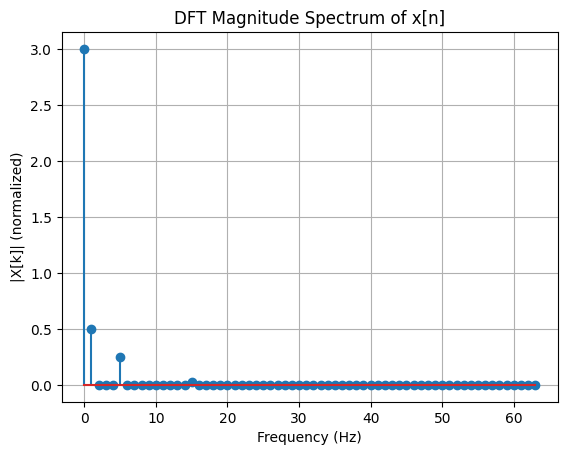

In [5]:
# DFT of x[n]
sr = 128
ts = 1.0/sr
t = np.arange(0, 1, ts)
N = len(t)

x = 3
x += 1*np.sin(2*np.pi*1*t)
x += 0.5*np.sin(2*np.pi*5*t)
x += 0.05*np.sin(2*np.pi*15*t)

F = gen_DFT_matrix(N)
X = F @ x

amplitude_spectrum = np.abs(X) / N
freqs = np.arange(N) * sr / N

# positive frequencies (up to Nyquist)
freqs_pos = freqs[:N//2]
amps_pos = amplitude_spectrum[:N//2]
threshold = 1e-3
nonzero_indices = np.where(amps_pos > threshold)[0]

print("Non-zero frequency components:")
for idx in nonzero_indices:
    print(f"Frequency: {freqs_pos[idx]:.2f} Hz, Amplitude: {amps_pos[idx]:.3f}")



plt.figure()
plt.stem(freqs[:N//2], np.abs(X[:N//2])/N)
plt.title("DFT Magnitude Spectrum of x[n]")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X[k]| (normalized)")
plt.grid(True)
plt.show()

The DFT spectrum shows shows distinct spectral peaks at 0 Hz, 1 Hz, 5 Hz, and 15 Hz, matching the constitutent sinusoidal frequencies used in the construction of the signal.

Q) Do the peak amplitudes correspond to the expected amplitudes in x(t)?

Yes, they correspond to the expected amplitudes, but are not exactly equal. For the constant term, the amplitude is same, but for the sinusoidal terms, they correspond to half of their corresponding amplitude in x(t).

# b) Effect of Slight Frequency Shift (DFT of Shifted signal y[n])

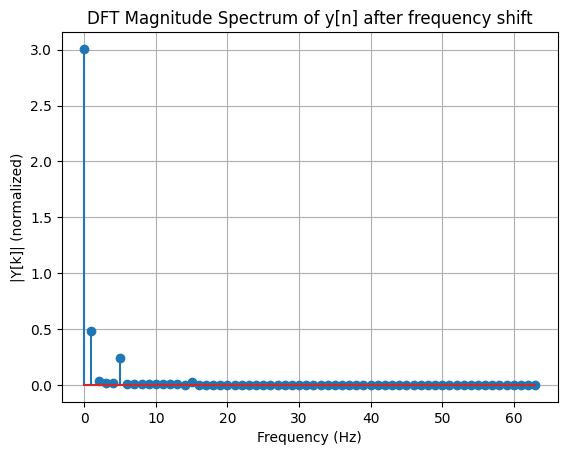

In [7]:
y = 3
y = y + 1*np.sin(2.1*np.pi*t)
y = y + 0.5*np.sin(2*np.pi*5*t)
y = y + 0.05*np.sin(2*np.pi*15*t)

Y = F @ y

plt.figure()
plt.stem(freqs[:N//2], np.abs(Y[:N//2])/N)
plt.title("DFT Magnitude Spectrum of y[n] after frequency shift")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Y[k]| (normalized)")
plt.grid(True)
plt.show()

In [8]:
amplitude_spectrum = np.abs(Y) / N
freqs = np.arange(N) * sr / N

# positive frequencies (up to Nyquist)
freqs_pos = freqs[:N//2]
amps_pos = amplitude_spectrum[:N//2]
threshold = 1e-3
nonzero_indices = np.where(amps_pos > threshold)[0]

print("Non-zero frequency components:")
for idx in nonzero_indices:
    print(f"Frequency: {freqs_pos[idx]:.2f} Hz, Amplitude: {amps_pos[idx]:.3f}")

Non-zero frequency components:
Frequency: 0.00 Hz, Amplitude: 3.006
Frequency: 1.00 Hz, Amplitude: 0.486
Frequency: 2.00 Hz, Amplitude: 0.034
Frequency: 3.00 Hz, Amplitude: 0.019
Frequency: 4.00 Hz, Amplitude: 0.013
Frequency: 5.00 Hz, Amplitude: 0.240
Frequency: 6.00 Hz, Amplitude: 0.009
Frequency: 7.00 Hz, Amplitude: 0.007
Frequency: 8.00 Hz, Amplitude: 0.006
Frequency: 9.00 Hz, Amplitude: 0.006
Frequency: 10.00 Hz, Amplitude: 0.005
Frequency: 11.00 Hz, Amplitude: 0.005
Frequency: 12.00 Hz, Amplitude: 0.004
Frequency: 13.00 Hz, Amplitude: 0.004
Frequency: 14.00 Hz, Amplitude: 0.004
Frequency: 15.00 Hz, Amplitude: 0.022
Frequency: 16.00 Hz, Amplitude: 0.003
Frequency: 17.00 Hz, Amplitude: 0.003
Frequency: 18.00 Hz, Amplitude: 0.003
Frequency: 19.00 Hz, Amplitude: 0.003
Frequency: 20.00 Hz, Amplitude: 0.003
Frequency: 21.00 Hz, Amplitude: 0.002
Frequency: 22.00 Hz, Amplitude: 0.002
Frequency: 23.00 Hz, Amplitude: 0.002
Frequency: 24.00 Hz, Amplitude: 0.002
Frequency: 25.00 Hz, Amplitud

### Q) Comment on why the spectrum appears to have more active frequencies than x[n]. Discuss in terms of frequency resolution and DFT bin alignment.

- **Frequency Resolution Limitation**  
  - With `N = 128` and `sr = 128 Hz`, the DFT frequency resolution is: f = sr/N = 1 Hz.
  - This means the DFT can only resolve frequencies that are **integer multiples of 1 Hz**.

- **Bin Alignment in x[n]**  
  - In the original signal `x(t)`, all sinusoids (1 Hz, 5 Hz, 15 Hz) **align exactly with integer DFT bins**.  
  - Result: sharp peaks at those bins with no leakage.

- **Bin Misalignment in y[n]**  
  - In the modified signal `y(t)`, one sinusoid has frequency **1.05 Hz**, which does **not align with an integer DFT bin**.  
  - The DFT cannot represent it as a single spike, so the energy spreads across multiple adjacent bins. Thhis is called **spectral leakage**.
  - This leakage makes the spectrum appear as though there are **multiple active frequency components**, even though there is really only one at 1.05 Hz.
  - The "extra frequencies" are caused by the **limited frequency resolution** and **bin mismatch**. They are not true signal components.

# (c) Improving Frequency Resolution

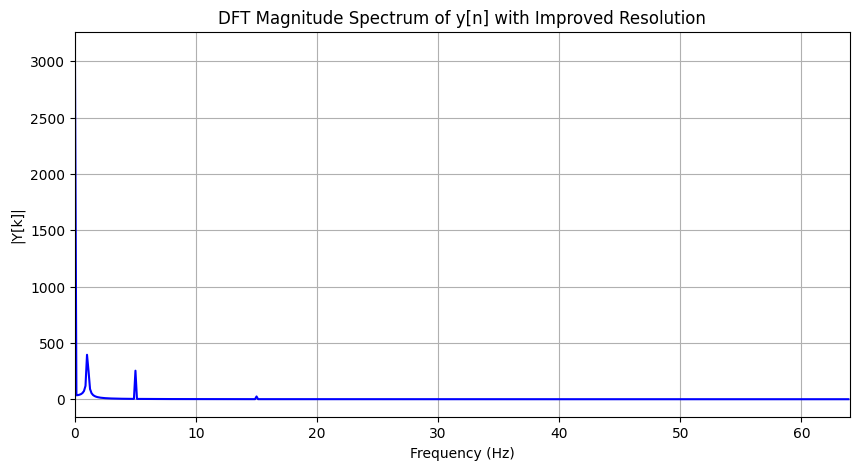

In [11]:
sr = 128
ts = 1.0 / sr

# Increase duration to improve frequency resolution
duration = 8
t = np.arange(0, duration, ts)


y = 3
y += np.sin(2.1 * np.pi * t)   # 1.05 Hz
y += 0.5 * np.sin(10 * np.pi * t)  # 5 Hz
y += 0.05 * np.sin(30 * np.pi * t) # 15 Hz

N = len(t)
Y = np.fft.fft(y, N)
freqs = np.fft.fftfreq(N, ts)

pos_mask = freqs >= 0
freqs = freqs[pos_mask]
Y_mag = np.abs(Y)[pos_mask]

# Plot spectrum
plt.figure(figsize=(10, 5))
plt.plot(freqs, Y_mag, 'b')
plt.title("DFT Magnitude Spectrum of y[n] with Improved Resolution")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Y[k]|")
plt.xlim(0, sr/2)  # Nyquist limit
plt.grid(True)
plt.show()


Improving frequency resolution has clearly reduced the spectral spreading and allowed sharper peaks to appear compared to (b).

### Q)  Discuss the trade-offs between sampling duration, number of points N, and frequency resolution in the DFT.

- **Frequency Resolution**  
    - Smaller Δf means better ability to distinguish closely spaced frequencies.

- **Sampling Duration**  
  - Longer observation time gives more samples, so larger `N` means finer frequency resolution.  
  - Trade-off: requires more data storage and computation, and may not be suitable if the signal changes over time.

- **Number of Points N**  
  - Directly determines frequency resolution.  
  - Larger `N` improves resolution but increases computational cost.  
  - Smaller `N` reduces computation but may cause spectral leakage and poor resolution.

- A balance must be chosen based on available data, signal characteristics, and computational limits.
